# Imports

In [9]:
import pynncml as pnc 
from matplotlib import pyplot as plt

# Load OpenCML Dataset

In [10]:
open_cml_dataset = pnc.read_open_cml_dataset('../dataset/open_cml.p') #  read OpenCML dataset

# Select Link and Plot link data

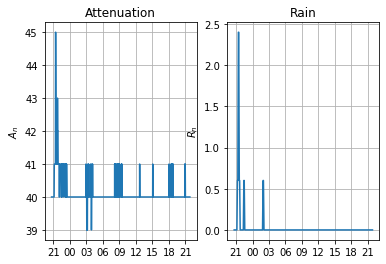

In [11]:
link_index = 19
link_data = open_cml_dataset[link_index] # select a link 
link_data.plot() # plot link data
plt.show()

# Run rain estimation using dynamic baseline

In [12]:
osd = pnc.rain_estimation.one_step_dynamic_baseline(pnc.power_law.PowerLawType.INSTANCE,1.2,8) # init classification model
rain = osd(link_data.attenuation(),link_data.meta_data) # run classification method

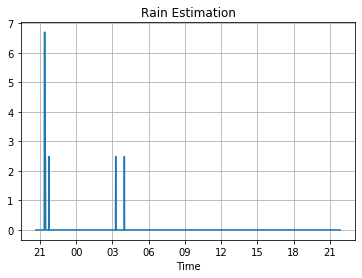

In [13]:
plt.plot(link_data.time(), rain.numpy()[0, :])
plt.title('Rain Estimation')
plt.xlabel('Time')
pnc.change_x_axis_time_format('%H')
plt.grid()
plt.show()

In [14]:
print("MSE Result: {0:.2f}".format(pnc.metrics.mse(rain.numpy(),link_data.rain())))

MSE Result: 0.08


# References
[1] J. Ostrometzky and H. Messer. Dynamic determination of the baseline level in microwave
links for rain monitoring from minimum attenuation values. IEEE Journal of Selected Topics
in Applied Earth Observations and Remote Sensing, 11(1):24–33, Jan 2018. ISSN 1939-1404. doi: 10.1109/JSTARS.2017.2752902. <br>
[2] Jonatan Ostrometzky, Adam Eshel, Pinhas Alpert, and Hagit Messer. Induced bias in attenuation measurements taken from commercial microwave links. In 2017 IEEE International
Conference on Acoustics, Speech and Signal Processing (ICASSP), pages 3744–3748. IEEE,2017. <br>
[3] Jonatan Ostrometzky, Roi Raich, Adam Eshel, and Hagit Messer.
Calibration of the
attenuation-rain rate power-law parameters using measurements from commercial microwave networks. In 2016 IEEE International Conference on Acoustics, Speech and Signal
Processing (ICASSP), pages 3736–3740. IEEE, 2016.
